In [3]:
import numpy as np
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()

In [5]:
data, labels = load_digits(return_X_y=True)

In [6]:
print(labels)

[0 1 2 ... 8 9 8]


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [39]:
#plt.gray() 
#plt.matshow(digits.images[2]) 
#plt.show() 

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =10, random_state=300)
kmeans_fitted = kmeans.fit(scaled_data)

In [10]:
print(kmeans.cluster_centers_.shape)

(10, 64)


In [11]:
kmeans.inertia_

69682.22199825614

In [37]:
kmeans.labels_[:20]

array([5, 8, 7, 3, 6, 9, 6, 4, 2, 2, 1, 7, 2, 3, 6, 4, 6, 7, 4, 9],
      dtype=int32)

In [14]:
labels[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
print('AMI score = ', adjusted_mutual_info_score(kmeans.labels_,labels))
print('homogeneity score =', homogeneity_score(kmeans.labels_,labels))
print('completeness_score = ',completeness_score(kmeans.labels_,labels))
print('V measure score =', v_measure_score(kmeans.labels_,labels))
print('Adjusted Rand Score =', adjusted_rand_score(kmeans.labels_, labels))

AMI score =  0.6946249158968866
homogeneity score = 0.7176677896632772
completeness_score =  0.6789392143217043
V measure score = 0.6977665211010488
Adjusted Rand Score = 0.5714946044932836


In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(data)

In [34]:
label = kmeans.fit_predict(df)
print(label)

[5 8 7 ... 7 9 2]


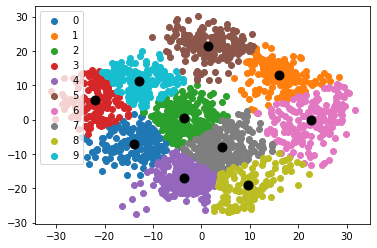

In [42]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')    
plt.legend()
plt.show()

Qu'est ce que le clustering ?
Est ce un probleme difficile ? pourquoi ? Donnez la compléxité en temps et mémoire
Quelle sont les métriques utilisés pour le clustering ?
différenc entre NMI et AMI ?

#### Est ce un probleme difficile ? pourquoi ? Donnez la compléxité en temps et mémoire:
La notion de compléxité revient à expliquer le temps et la mémoire utilisés pour trouver la solution optimale au problème de clustering k -means, pour les observations en dimensions d. Si k et d (la dimension) sont fixes, le problème peut être résolu exactement dans le temps

O(n^(dk+1))

où n est le nombre d'entités à mettre en cluster.
cette formule nous permet de trouver l'optimum global ce qui pourra être consommateur de temps et d'energie. le but est donc de trouver un optimum local à travers: 

#### Quelle sont les métriques utilisés pour le clustering ?
Pour le clustering on utilise 2 types de métriques: 
- Elbow method: identifie les centroides en se basant sur le distance au carré (SSE) entre les points de données et les centres de gravité de leurs clusters assignés.
- Silhouette analysis: détermine le degré de séparation entre les clusters. 
Pour chaque échantillon:
    * on calcule la distance moyenne de tous les points de données dans le même cluster (ai).
    * on calcule la distance moyenne de tous les points de données dans le cluster le plus proche (bi).
    * on calcule le coefficient:

        (b^i - a^i)/ max(a^i, b^i)

    Le coefficient peut prendre des valeurs dans l'intervalle [-1, 1].
    S'il vaut 0 -> l'échantillon est très proche des clusters voisins.
    C'est 1 -> l'échantillon est loin des clusters voisins.
    C'est -1 -> l'échantillon est affecté aux mauvais clusters.